# Python for Kinematics: Motion Diagram

### Kinematic Equation

I want to introduce you in this post how we can use `python` to graph motion diagrams or plots such as *postion-time*, *velocity-time*, *acceleration-time*. Graphs are helpful in many instances, and we use them in physics more often to 'see' the result. By looking at the plots we can understand what kind of relationship exists between two parameters and/or variables. Moreover, looking-visually- at a graph makes it easy to grasp the situation and help us widen our understanding. By looking at graphs, it is easily to answer questions like: Do I have linear relationship? or quadratic? or higher order polynomial? all this can be deduced after ploting the results. For some simple forms, the graphs help us to establish equations too, thereby allowing us generalize the conclusion. 

I will disscus here the simple use of Python to describe motion a system, specifically in a frictionless system, where we assume its effect is negligible, and use the plotted graph to decribe the motion and arrive at solution if need be. 

Since my aim is to show how to use python to get motion diagrams, I am skipping the derivation of kinematic equations in here. I believe you already are able to do so, if not I refer you to [Wikipedia](https://en.wikipedia.org/wiki/Equations_of_motion). For convenienece we list the basic kinematic equations of motion as:

> $v_{avg} =\frac {v_{i} + v_{f}}{2}$  
  $s=v_{avg}t$  
  $v_{f} = v_{i} + a t$  
  $v^2_{f} = v^2_{i}+2as$  
  $s= v_{i}t + \frac{1}{2}at^2$  
  
  
One point worth mentioning about these equations is that they are used in a situation where the **acceleration is is constant**. These types of motion usually are referred to as Uniformly Accelerated Rectilinear Motion (UARM). Rectilinear-- indicates that the trajectory is a straight line.

I assume you have already installed python(https://www.python.org) in your machine and have basic knowldge of how it works. For this tutorial you just need very basic know-how of python. 

Let me first import the libraries that I need for this particular post, as you will see below we are going to use them for plotting, forming data frame, and obtaining an intersection point/s. 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from shapely.geometry import LineString
from statistics import mean

from sympy import *
#from sympy import symbols
#from sympy import plot

from math import sqrt

First let us see how we can plot a simple motion diagram, to exemplify I have the following data points that I got from[Serway](https://books.google.com/books/about/Physics_for_Scientists_and_Engineers_Cha.html?id=3dFWOQmkweMC). We are using SI units, we have a record of a motion, in x-axis, of an object as described by the time taken (in seconds) to cover the specified distance (in meters). 

First thing we need to do is put it in a DataFrame, so that we can make use of pandas library to do some calculation.

In [2]:

position_data = {'t (s)': [0, 1, 2, 3, 4, 5], 'x(m)': [30, 52, 38, 0,-37,-53]}
position_DataFrame= pd.DataFrame.from_dict(position_data)
position_DataFrame


,t (s),x(m)
0,0,30
1,1,52
2,2,38
3,3,0
4,4,-37
5,5,-53


Once we got the data in DataFrame, we can use functions like `max()`, `min()`, `median()`, `mean()` to get the feel of the data

In [3]:

# We can print, min, max, mean, average of postion
print(f"The max value of the position is: {position_DataFrame['x(m)'].max()}")
print(f"The min value of the position is: {position_DataFrame['x(m)'].min()}")
print(f"The mean value of the position is: {position_DataFrame['x(m)'].mean()}")
print(f"The median value of the position is: {position_DataFrame['x(m)'].median()}")



The max value of the position is: 52
The min value of the position is: -53
The mean value of the position is: 5.0
The median value of the position is: 15.0


Also if you want to see it visually you can plot the data frame as follows, we are going to use scatter plot as we have very few data. But if you have ample data points then you can use line plot. The line plot connects the data points, and if we have very few data points like ours the curve won't be smooth. We will see examples in the next section.

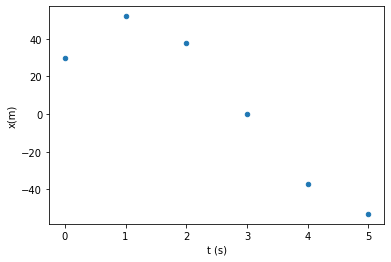

In [4]:
position_DataFrame.plot(kind='scatter',x='t (s)', y='x(m)');

This is a very simple, straight-forward plot of the data points, and we can see from the motion diagram of $x$ versus $t$ that the postion starts at 30m and goes down to -53m as time proceeds, and the curve looks kind of inverted parabola.

Next step is to calculate the speed from our data, and by definition $\Delta v = \frac{\Delta x}{\Delta t}$, where $\Delta = Final - Initial$. Therefore by considering each row as initial value for the next row, we can calculate the speed using the following code line.

In [5]:

# calculates speed from postion and time
position_DataFrame['v(m/s)'] = (position_DataFrame['x(m)'] - position_DataFrame['x(m)'].shift(1)) / (position_DataFrame['t (s)'] - position_DataFrame['t (s)'].shift(1))
position_DataFrame


,t (s),x(m),v(m/s)
0,0,30,NaN
1,1,52,22.0
2,2,38,-14.0
3,3,0,-38.0
4,4,-37,-37.0
5,5,-53,-16.0


Notice here that, the first value of in v(m/s) is `NaN`, this happens because it doesn't have a previous row to subtract from. So we need to manually replace it by zero.

In [6]:

# Replace null values by zero
position_DataFrame =position_DataFrame.fillna(0)
position_DataFrame


,t (s),x(m),v(m/s)
0,0,30,0.0
1,1,52,22.0
2,2,38,-14.0
3,3,0,-38.0
4,4,-37,-37.0
5,5,-53,-16.0


Again if we have information about speed, then we can calculate the accelaration. The step is pretty much the same as previous one, though now we take speed instaed of postion as by definition $\Delta a = \frac{\Delta v}{\Delta t}$. Recall each entry of the row is input as an intial value for the next row. Don't forget to replace the null values by zero.

In [7]:

#Calculate acceleration from speed
position_DataFrame['a(m/s^2)'] = (position_DataFrame['v(m/s)'] - position_DataFrame['v(m/s)'].shift(1)) / (position_DataFrame['t (s)'] - position_DataFrame['t (s)'].shift(1))
position_DataFrame =position_DataFrame.fillna(0)
position_DataFrame


,t (s),x(m),v(m/s),a(m/s^2)
0,0,30,0.0,0.0
1,1,52,22.0,22.0
2,2,38,-14.0,-36.0
3,3,0,-38.0,-24.0
4,4,-37,-37.0,1.0
5,5,-53,-16.0,21.0


## Smooth Curve Plots

We have seen earilier that when your data points are taken to be few, the plot is better viewed via scatter plot as our eye connects the dot and completes the curve. But if we try to make a line plot, as we see below, the line tries to connect each data points and based on that it yields plot. 

<span style="color:blue">Let us take an **example** where an object is thrown upward with an intial velocity of $20m/s$, we want to calculate the total height the object covers when t is five seconds. For this case we chose the kinematic equation with $s=h$ and $a=g$, to get an equation of the form $y=y_i + v_i t - \frac{1}{2}gt^2$, where acceleration deue to gravity is given to be $g=9.8 m/s^2$.</span>

We can use the `range()` method in pandas to list five time points and form data frame, this produces a one column DataFrame, next we can add another column to the DataFrame that calculates the height (based on the above formula) and let us name this column to be 'y'. That is it we just formed a DataFrame that has time and postion as its columns. If you notice this is the same dataFrame as the one seen above. That means we can plot and see the relationship. One point worth noting is that while using the `range()` function with **start** and **stop** points, the range of integers end at **stop – 1**. Of course we could a step size, but the steps shoup be in _int_.

```python
# The following creates a one-columned dataframe
time = pd.DataFrame({'t':range(0,6)})
#Next we calculate height and add the result as second column
time['y'] = 0 + 20 * time['t'] - time['t'] **2 * 0.5* 9.8
# recall t**2 is t squared
```

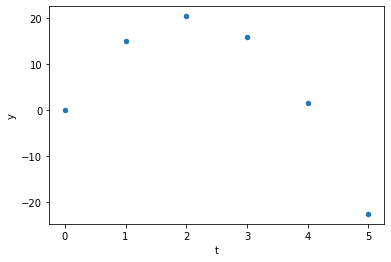

In [8]:

# form data frame out of time points
time = pd.DataFrame({'t':range(0,6)})
time['y'] = 0 + 20 * time['t'] -  0.5* 9.8*time['t'] **2 
time.plot(kind='scatter',x='t',y='y');
#print time to see the data frame


As expected we have taken five time-points and used the formula to obtain corresponding five points in the postion column, and the graph shows where each points are located. Let us see what kind of plot we get if we use line plot instead of scatter. 

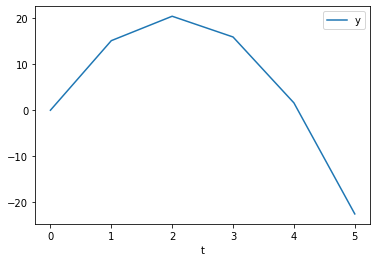

In [9]:

# line plot
time = pd.DataFrame({'t':range(0,6)})
time['y'] = 0 + 20 * time['t'] - 0.5* 9.8*time['t'] **2  
time.plot(kind='line',x='t',y='y');


You can see that the points are connected by a line, but the curve is not smooth. The question then is based on the above formula how can we get a smooth curve. The answer lies in the data points we take. Even if we want to plot the distance vs time, between zero to five seconds, we need as much points as possible to make the connection between the data point smooth enough. 

If we say the total time is plotted from 0 to $T$, as of now we have 5 points in this line (which is stretched from zero to T = 5 ), but now let us divide this line into $n$ many segements each length $\delta t$, and consequently we have $\delta t = T/N $. The smaller the segement the more smooth our curve becomes, this is so because $ N = T/\delta t$. 

To achive this we use numpy's `linspace`, which returns evenly spaced numbers over a specified interval.

>`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)`  
Returns **num** evenly spaced samples, calculated over the interval [start, stop].
The endpoint of the interval can optionally be excluded.

Now let us apply this method to our problem at hand and see what our motion diagram looks like now.

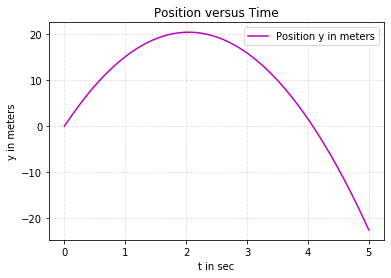

In [10]:
# using \delta t = T/N
time =10
dt = 0.1;
n = int(round(time/dt))
t = np.linspace(0,5,n) # time axis with n-points

y = 0+20*t-0.5*9.8*t**2 #here is our equation

# Create the plot
plt.plot(t, y,label='Position y in meters', color ='m')

# Add a title
plt.title('Position versus Time')


# Add X and y Label
plt.xlabel('t in sec')
plt.ylabel('y in meters')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot
plt.show()

From these graphs we can see that at t=5 sec, the distance is 22.5 m. Of course this is simple problem and one can arrive at the solution using easy plugging, but this approach is preferable when you have complicated and more variables. Moreover this is fun way to do it!

We can also use motion diagrams when one the dependece relation of one variable on another variable is known as in the following **example**
><span style="color:blue">A particle moves along the x axis. Its position varies with time according to
the expression $x =- 4t + 2t^2$ , where $x$ is in meters and $t$ is in seconds.</span>

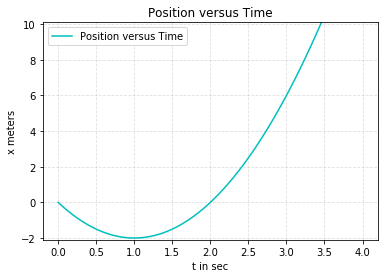

In [11]:
x=0


time =10
dt = 0.1;
n = int(round(time/dt))
t = np.linspace(0,4,n)
# Create the vectors X and Y
#t = np.array(range(0,5,n))
# choses very few data so better make it smooth with ff 
x = x-4*t+2*t**2

# Create the plot
plt.plot(t, x,label='Position versus Time', color='c')



# Add a title
plt.title('Position versus Time')

# Add limit
#plt.xlim()
plt.ylim(-2.1,10.1)

# Add X and y Label
plt.xlabel('t in sec')
plt.ylabel('x meters')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot
plt.show()

Because the position of the particle is given by a mathematical function, the motion of the particle is completely known. One can see from the position–time graph that the particle moves in the negative 
x direction for the first second of motion, is momentarily at rest at the moment t = 1 s, and moves in the positive x direction at times t > 1 s.

Actually we can use python's symbolic library and obtain the speed and acceleration of the particle as follows, recall velocity is the derivative of position; acceleration inturn is the derivative of velocity. The first thing we need to. do is tell python to symbolize time, and based on that we call the `diff()` function for differentiating x with respect time to get velocity; and then velocty with respect time to get acceleration. Here is how you. will do. it.

In [12]:

t = Symbol('t')
x = -4*t+2*t**2
v=x.diff(t) # dx/dt
a = v.diff(t)# dv/dt
print(f"The positon is: {x}")
print(f"The speed  is: {v}")
print(f"The acceleration  is: {a}")


The positon is: 2*t**2 - 4*t
The speed  is: 4*t - 4
The acceleration  is: 4


We can also visualize  these results as follows, <span style="color:blue">**blue curve is position**</span>,
<span style="color:red">**red curve is speed**</span>, and <span style="color:green">**green curve is acceleration**</span>

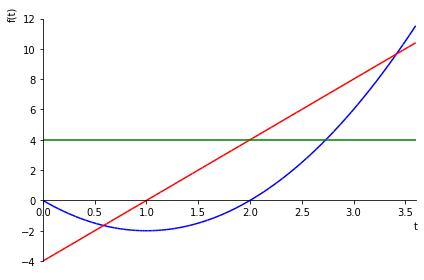

In [13]:


p = plot(x, v, a, (t, 0, 3.6), show=false)
#change the color of p's
p[0].line_color = 'b' # x
p[1].line_color = 'r' # v
p[2].line_color = 'g' # a

p.show()


Ontop of providing a clearer picture of the situation at hand, motion diagram also help us answer questions like the following **example** without having to solve them by hand.
  
><span style="color:blue">Car A starts from rest and has an acceleration of $5.6 m/s^2$. Another car Car B starts at the other end of a track such that it is $2000$ meters away from Car A and driving towards car A. Car B starts with a velocity of $42 m/s$ and has an acceleration of $2.4 m/s^2$. Where and when do the two cars meet.</span>


To begin with let us solve the equation analytically. To thsi end we assume they met at postion $x$ from car A's starting point, which means $2000-x$ away from car B's starting position. The distance for both cars respectively can be calculated using:

Car A: $x= (0m/s)t + \frac{1}{2}(5.6)(m/s^2)t^2(s^2)$

Car B: $2000-x= (-42m/s)t + \frac{1}{2}(2.4)(m/s^2)t^2(s^2)$

Equating both equations and rearranging like terms reduces the pair of equations into the following quadratic equation: $4.0 t^2 -42t-2000=0$. Now we can solve this equation using the quadratic formula, or we can feed the formula as a code for our computer to solve it. For this post we chose the later, and we can write the code as follows


In [14]:

# Use cmath instead of math if you are working with complex numbers
#import cmath

a = 4
b = -42
c = -2000
d = (b**2) - (4*a*c)
root1 = (-b-sqrt(d))/(2*a)
root2 = (-b+sqrt(d))/(2*a)
print(root1)
print(root2)


-17.71872874148676
28.21872874148676


Looking at the times we can chose to ignore the negative time since we take $t = 0$ as our initial time, based on this information we conclude they meet around $t=28$ seconds.  

Now let me use motion diagram to see if we can arrive at a similar solution. All we need to do here is just plot the distance versus time graph, for both cars, and see if they interesect; and if they do at what time? 

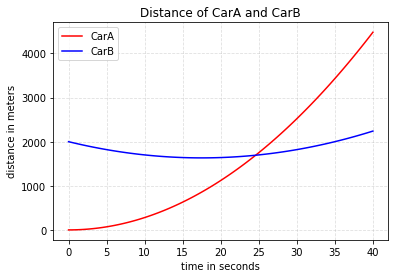

In [15]:

# informations we gathered from the question 
xA=0
xB=2000
vA=0
vB=-42
aA=5.6
aB=2.4

# calculate distance traveled by Car A and Car B respectively
time=10
dt = 0.1;
n = int(round(time/dt))
t = np.linspace(0,40,n)
xA = xA  + vA*t+0.5*aA *t**2
xB = xB + vB*t+0.5*aB *t**2
# Create the plot
plt.plot(t, xA,label='CarA', color='r')
plt.plot(t, xB,label='CarB', color ='b')


# Add a title
plt.title('Distance of CarA and CarB')

# Add X and y Label
plt.xlabel('time in seconds')
plt.ylabel('distance in meters')


# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot
plt.show()

Great! we see that CarA starts from zero, while CarB starts 2000m away, after some time (approximately around 25 sec-- by looking at it) they meet,and then depart again. But our eye might be decieving us so, it will be helpful to look for a way that pinpoints the exact meeting point. I found a way to do this in a [stackoverflow](https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value) discussion. Of the suggestion provided, I found the **Shapely** package relevant for our case. So what is it?

**Shapely** is a Python package for set-theoretic analysis and manipulation of planar features for geometry-related computations. We are going to make use of this library to obtain the intersection point/s. To this end, all we need to do is construct `LineString` from each line and get their intersection using the code given below. But if you are wondering what is `LineString`?
>`class LineString(coordinates)`
The LineString constructor takes an ordered sequence of 2 or more (x, y[, z]) point tuples.

Check for the discussions in [stackoverflow](https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value) as there are other interseting methods listed in there too for you to check them out.
>`object.intersection(other)`
Returns a representation of the intersection of this object with the other geometric object.

Here is the snippet of the code, that we use to get the intersection point or points, we will include it into our code and pinpoint the exact intersection point. What this code does is take points in the lines (of CarA and CarB) then form a LineString. Next look for intersection and plot it.

```python
first_line = LineString(np.column_stack((t, xA)))
second_line = LineString(np.column_stack((t, xB)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')
```


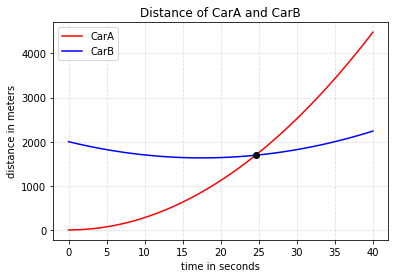

In [16]:

# informations we gathered from the question 
xA=0
xB=2000
vA=0
vB=-42
aA=5.6
aB=2.4


time=10
dt = 0.1;
n = int(round(time/dt))
t = np.linspace(0,40,n)
xA = xA  + vA*t+0.5*aA *t**2
xB = xB + vB*t+0.5*aB *(t)**2
# Create the plot
plt.plot(t, xA,label='CarA', color='r')
plt.plot(t,xB,label='CarB', color='b')


# Add a title
plt.title('Distance of CarA and CarB')

# Add X and y Label
plt.xlabel('time in seconds')
plt.ylabel('distance in meters')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot

#To show intersection
first_line = LineString(np.column_stack((t, xA)))
second_line = LineString(np.column_stack((t, xB)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o', color = 'black')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o', color = 'black')
plt.show()

Nice! The dot at the intersection of the curves indicates that we are able to pin point the exact point. But still we need to print the result. To do so we can readily use the following line of code

In [17]:
xA, xB = intersection.xy # use this if it is single point
#xA, xB = LineString(intersection).xy
print(xA,xB)

array('d', [24.587667975333915]) array('d', [1692.8064038129573])


The intersection time is thus about 24.6 seconds; and the meeting distance is 1692.8 meters. You can see it is off by few seconds from the analytical result, but that is . We may need to check our margin of error.

Let add another **example** and employ the above method:
><span style="color:blue">A car traveling at a constant speed of 45.0 m/s passes a trooper on a motorcycle hidden behind a billboard. One second after the speeding car passes the billboard, the trooper sets out from the billboard to catch the car, accelerating at a constant rate of 3.00 m/s . How long does it take the trooper to overtake the car?</span>

> Car: $xC = 45 t$  
  Tropper: $xT = 0.5*3.0(t-1)^2$ 
  
When trooper overtakes the car, the distance covered by the trooper and car. will be the same,  i.e $xC=xT$, and noting that the trooper began her journey a second later, the equations of motion takes the form: $t^2-32t+1=0$

In [18]:
a1 = 1
b1 = -32
c1 = 1
d1 = (b1**2) - (4*a1*c1)
rootC = (-b1-sqrt(d1))/(2*a1)
rootT = (-b1+sqrt(d1))/(2*a1)
print(rootC)
print(rootT)

0.03128057732868861
31.968719422671313


Again, here also, we have two time outputs, and we note that the first result is when they first met at the billboard and the second is the time we are interested in, and that says trooper overtakes the car around 31.9 seconds. Let us now see if we can reproduce these result using motion diagram.

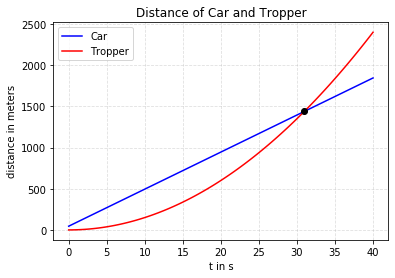

In [19]:
#Given
xC=45
xT=0
vC=45
vT=0
aC=0
aT=3


dt = 0.1;#0.00001
n = int(round(time/dt))
t = np.linspace(0,40,n)
xC = xC  + vC*t+0.5*aC *t**2
xT = xT + vT*t+0.5*aT *t**2
# Create the plot
plt.plot(t, xC,label='Car', color='b')
plt.plot(t,xT,label='Tropper', color='r')


# Add a title
plt.title('Distance of Car and Tropper')

# Add X and y Label
plt.xlabel('t in s')
plt.ylabel('distance in meters')

# Add limit
#plt.xlim(-1,32)
#plt.ylim(0,1600)

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot

#To show intersection
first_line = LineString(np.column_stack((t, xC)))
second_line = LineString(np.column_stack((t, xT)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o', color = 'black')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o', color = 'black')
plt.show()

We can see that we the interesection point is a bit pass 30 seconds, we used our Shapley library to pinpoint the intersection time.

Thanks to the Shapely library for geometry-related computations, getting the 
intersection will be much easier. You just have to construct `LineString` from 
each line and get their intersection as follows:

In [20]:
xC, xT = intersection.xy # use this if it is single point
#x, y = LineString(intersection).xy
print(xC,xT)

array('d', [30.967548500881836]) array('d', [1438.5396825396826])


Excellent! This actually is close enough to the analytical result we have obtained.

To conclude we have seen how to use python to plot motion diagrams and solve our problems, we also have managed to get an intersection point of the curves.